In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib for data visualization
import glob
import os
import ntpath

# Example

In [12]:
df = pd.read_csv("ACC.csv", names=['x','y','z'], skiprows = [0,1])

In [13]:
df.head()

,x,y,z
0,47,-2,43
1,52,2,42
2,53,7,43
3,53,6,42
4,49,1,41


In [14]:
df *= 2/128

In [15]:
df.head()

,x,y,z
0,0.734375,-0.031250,0.671875
1,0.812500,0.031250,0.656250
2,0.828125,0.109375,0.671875
3,0.828125,0.093750,0.656250
4,0.765625,0.015625,0.640625


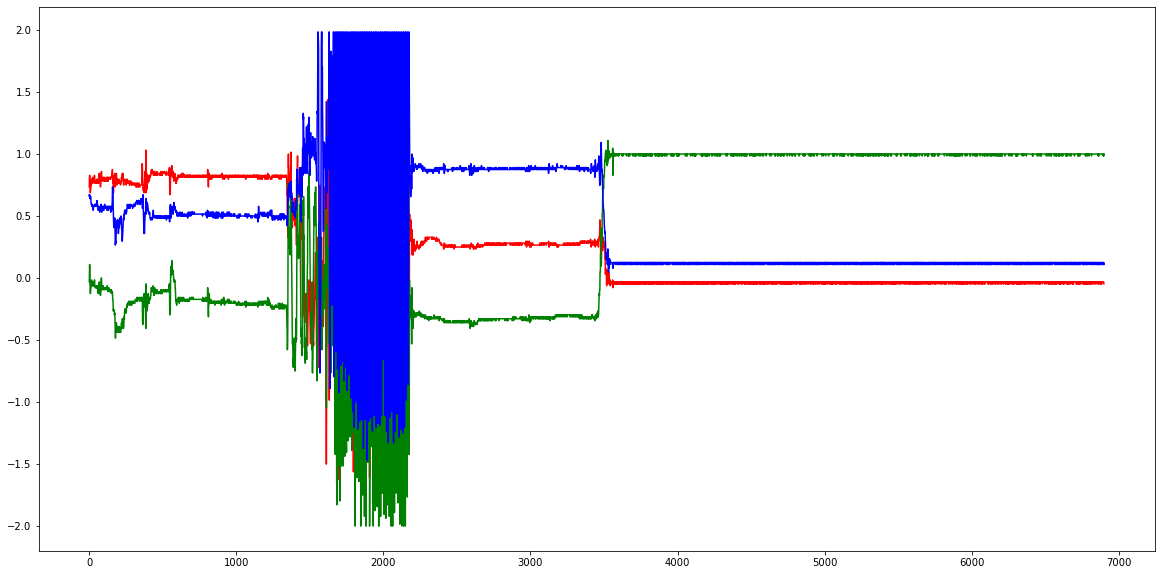

In [17]:
plt.figure(figsize=(20,10))

plt.plot(df['x'], color='r')
plt.plot(df['y'], color='g')
plt.plot(df['z'], color='b')



In [29]:
df['x']

0       0.734375
1       0.812500
2       0.828125
3       0.828125
4       0.765625
          ...   
6895   -0.031250
6896   -0.031250
6897   -0.031250
6898   -0.031250
6899   -0.046875
Name: x, Length: 6900, dtype: float64

# Calculate sum

In [38]:
sums = []
avgs = []
sum = 0
avg = 0
for i in range(len(df)):
    if i % 32 == 0:
        sums += [sum]
        avg = avg*0.9+(sum/32)*0.1
        avgs += [avg]
        sum = 0
    else:
        sum += max(abs(df['x'][i] - df['x'][i-1]), abs(df['y'][i] - df['y'][i-1]), abs(df['z'][i] - df['z'][i-1]));

In [39]:
avgs

[0.0,
 0.0025390625,
 0.0037011718750000005,
 0.0055771484375,
 0.006240136718750001,
 0.007373935546875001,
 0.010640448242187501,
 0.01196898154296875,
 0.012920520888671877,
 0.01289800004980469,
 0.012633590669824222,
 0.0124444503528418,
 0.01549688031755762,
 0.01912297353580186,
 0.018626691807221672,
 0.017740585126499505,
 0.017089573488849555,
 0.0165036630149646,
 0.01949196858846814,
 0.019251756104621327,
 0.018498455494159193,
 0.017722828694743276,
 0.01712242082526895,
 0.016191428742742056,
 0.01506056711846785,
 0.014677557281621066,
 0.01599300467845896,
 0.015858547960613065,
 0.01544456816455176,
 0.015413783223096585,
 0.014946623650786927,
 0.014428523785708235,
 0.013962233907137411,
 0.013347260516423671,
 0.013282065714781304,
 0.012735109143303175,
 0.012975270103972859,
 0.012751961843575573,
 0.012892781284218016,
 0.013214831280796216,
 0.012918738777716595,
 0.013287021149944934,
 0.013423162784950442,
 0.023701940256455396,
 0.029437214980809857,
 0.0394

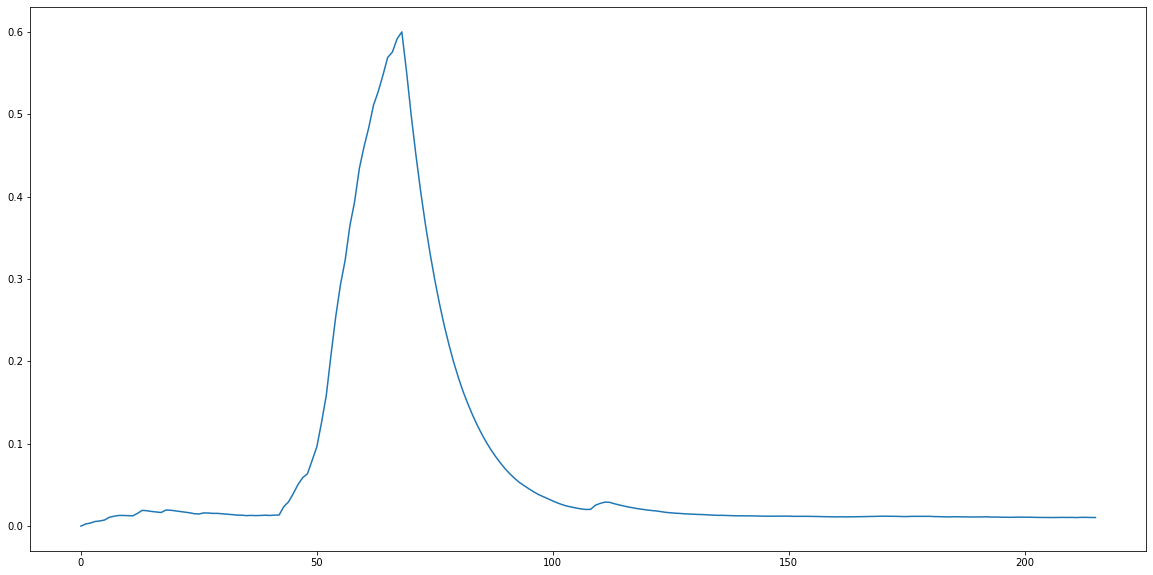

In [40]:
plt.figure(figsize=(20,10))
plt.plot(avgs)

In [24]:
df2 = pd.DataFrame(result)

In [25]:
df2

,0
0,0.000000
1,0.812500
2,0.453125
3,0.718750
4,0.390625
...,...
211,0.281250
212,0.406250
213,0.343750
214,0.281250


In [89]:
df2.to_csv (r'result.csv', index = False, header=True)

# Start analyzing

In [2]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return (head, tail)

In [3]:
(head, tail) = path_leaf('ACC ก่อนแปลงไฟล์/test.dat')
os.path.exists('output/'+head)
newpath = os.path.join('output/', head, tail)
print(newpath)

output/ACC ก่อนแปลงไฟล์/test.dat


<ipython-input-4-22a8a8eb7014>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


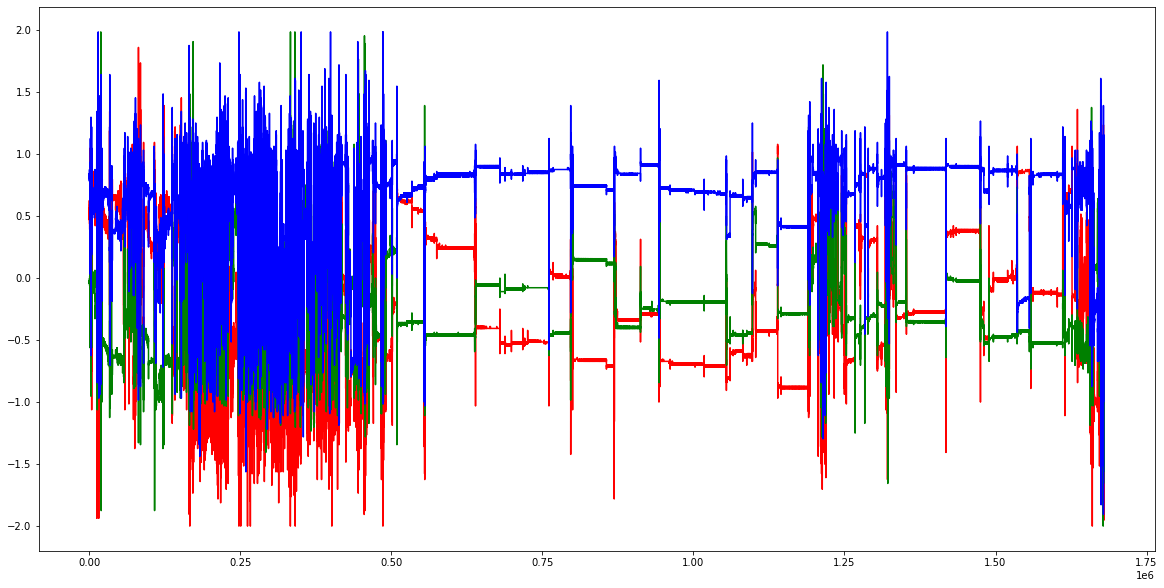

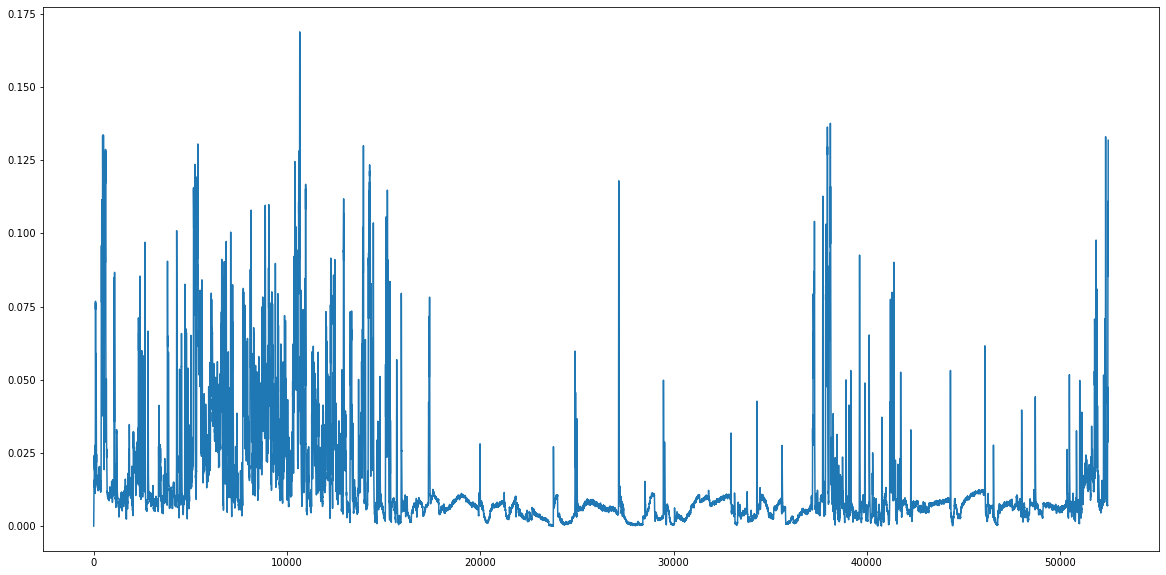

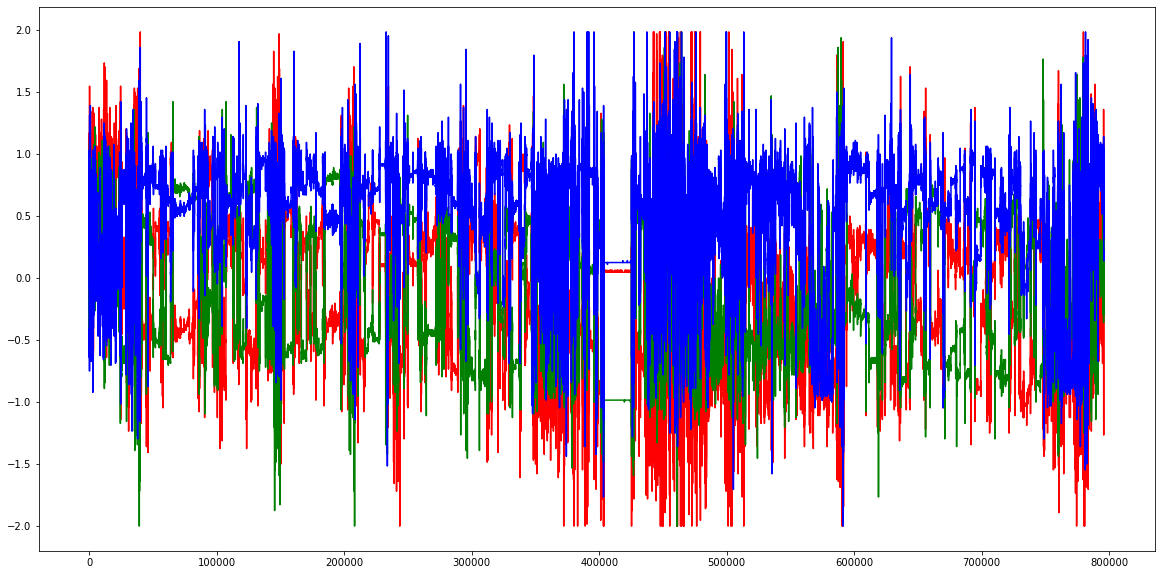

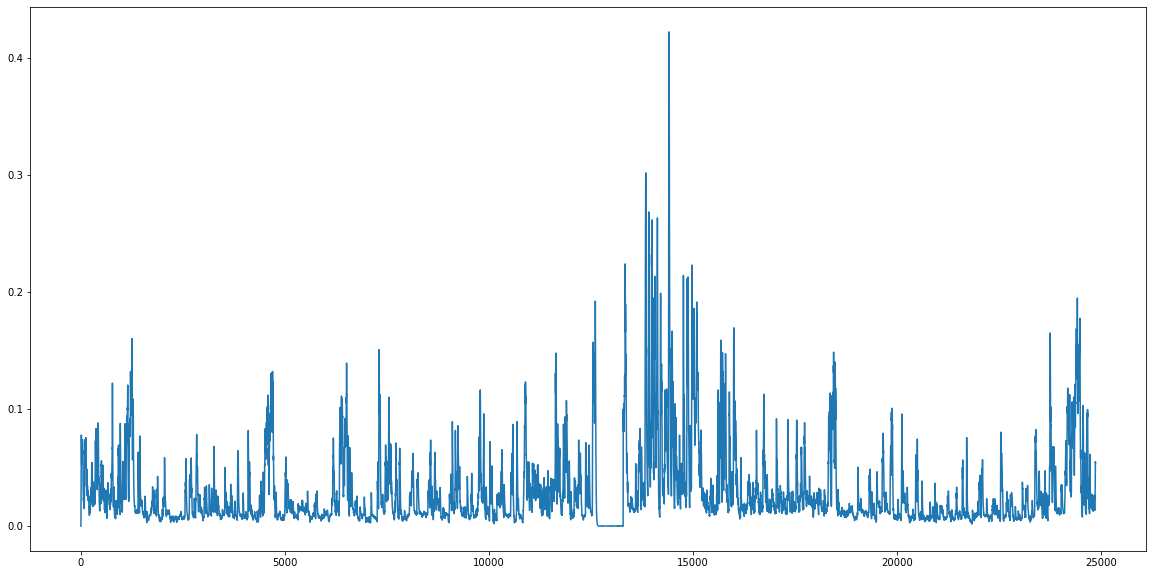

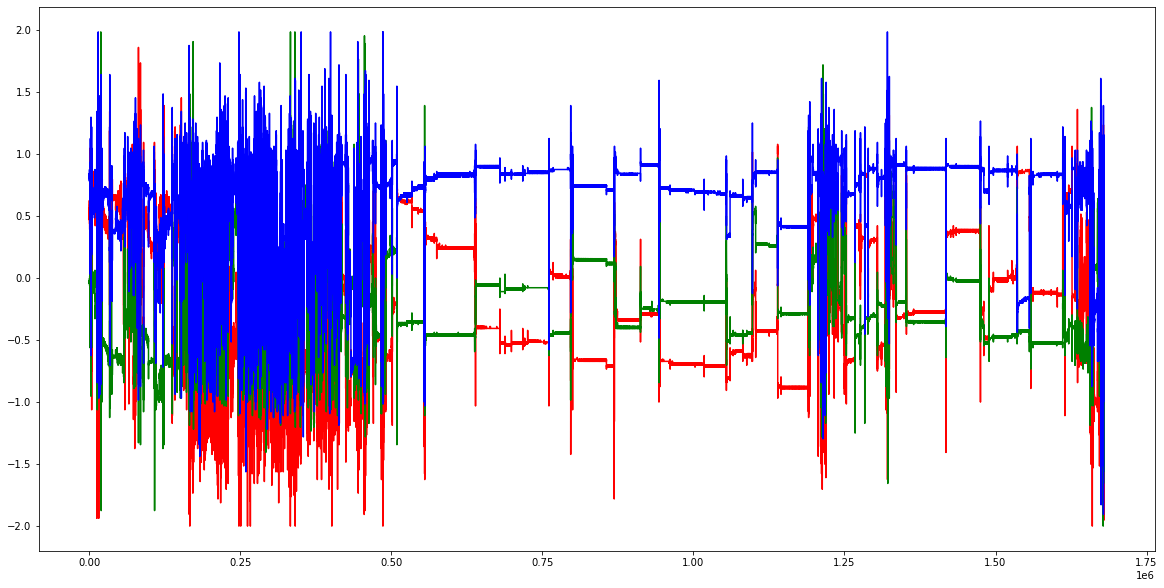

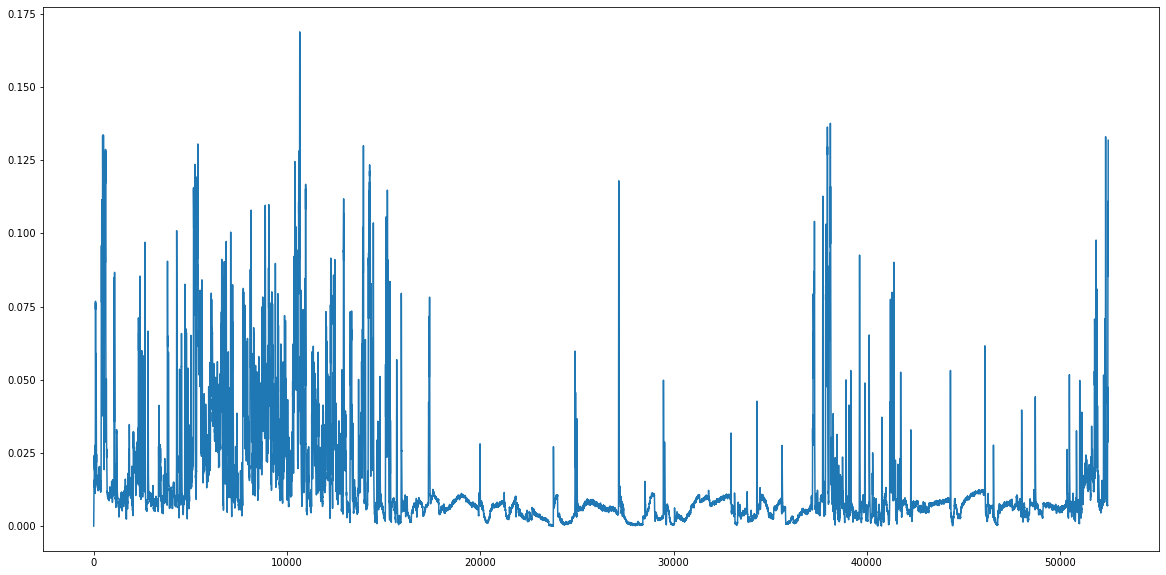

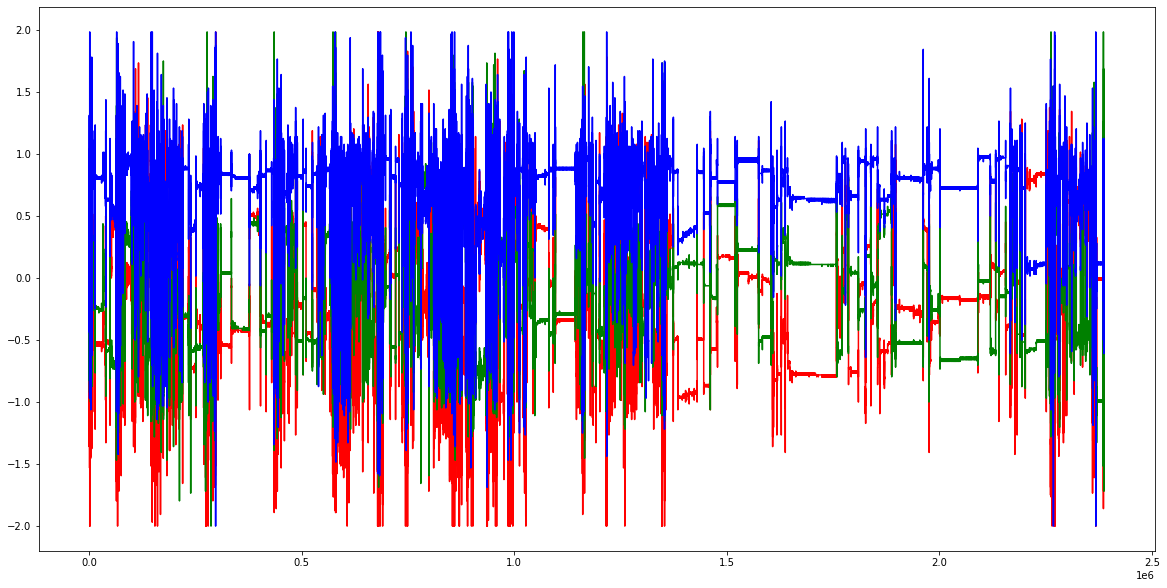

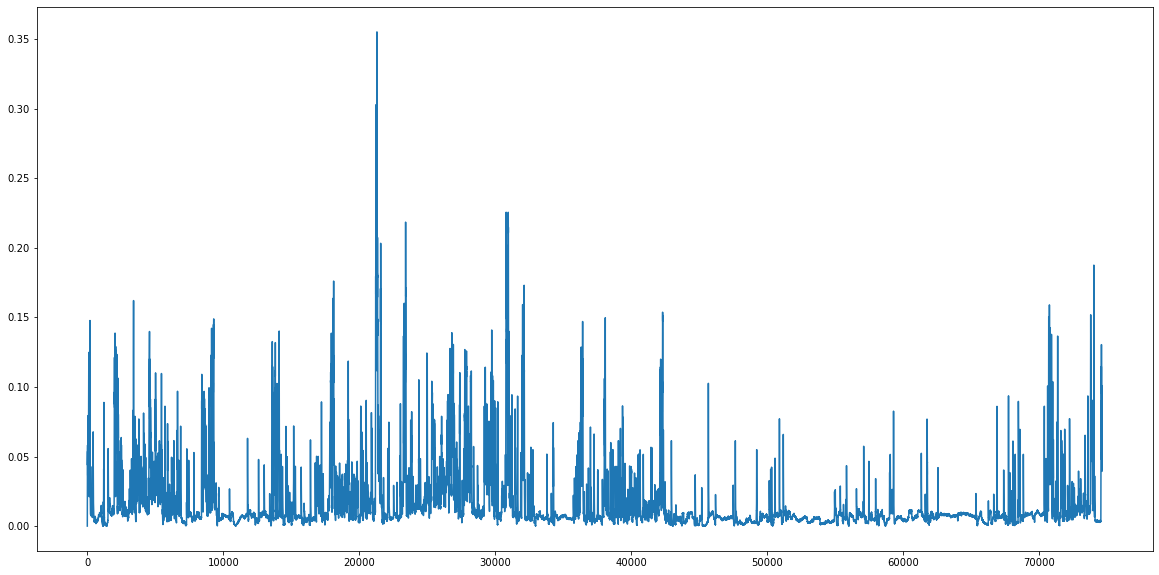

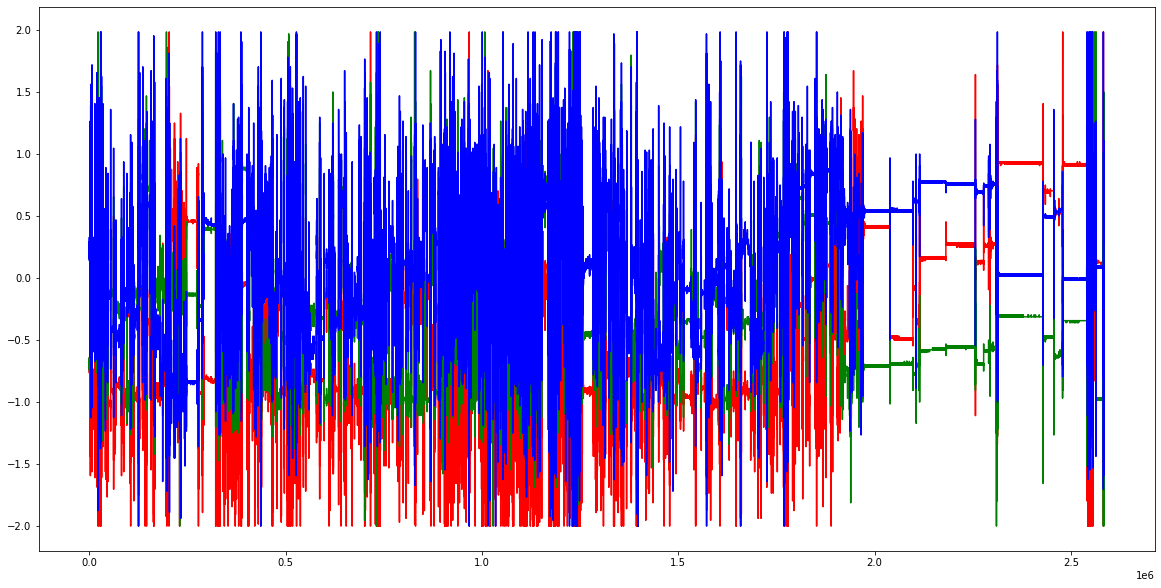

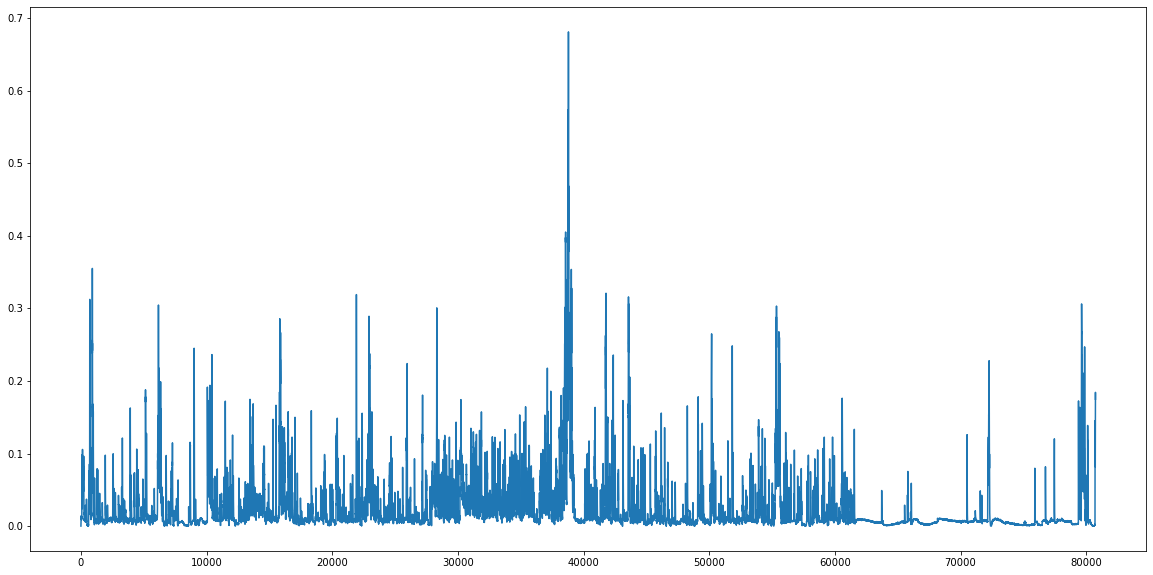

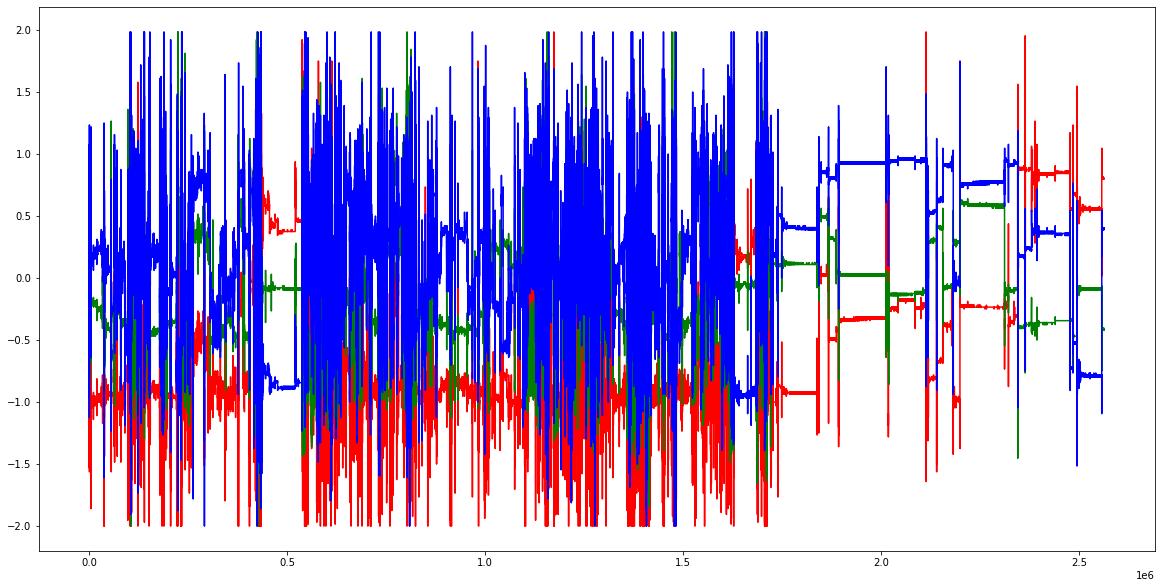

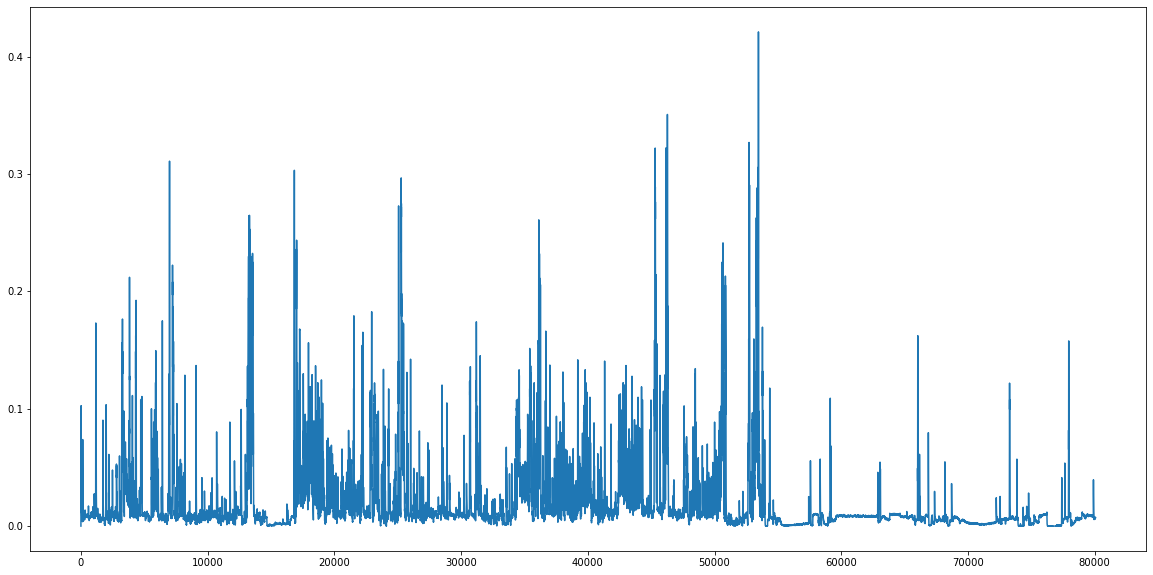

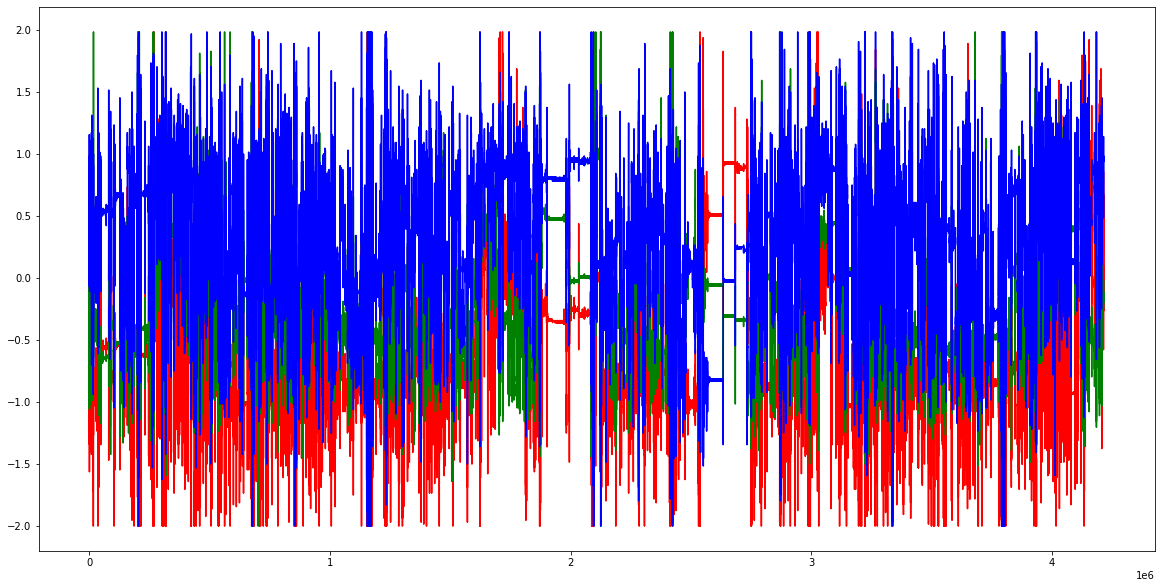

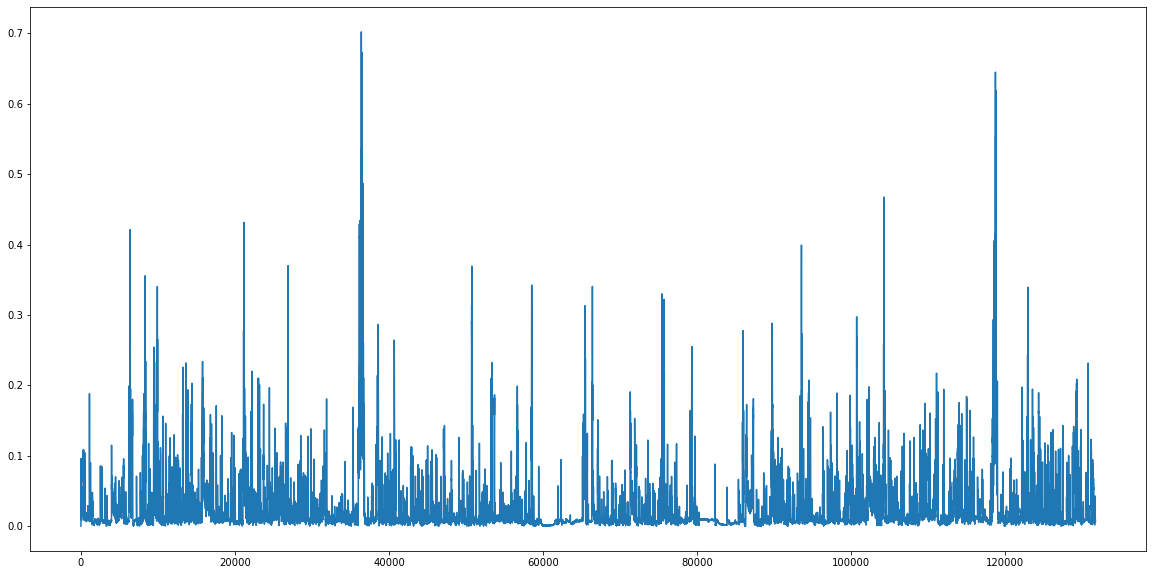

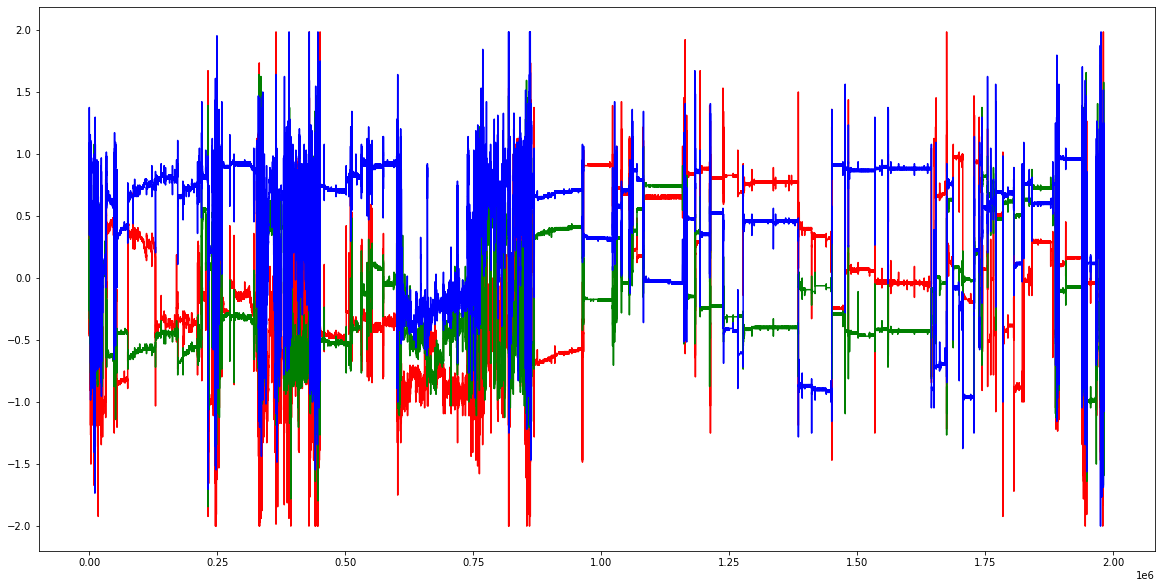

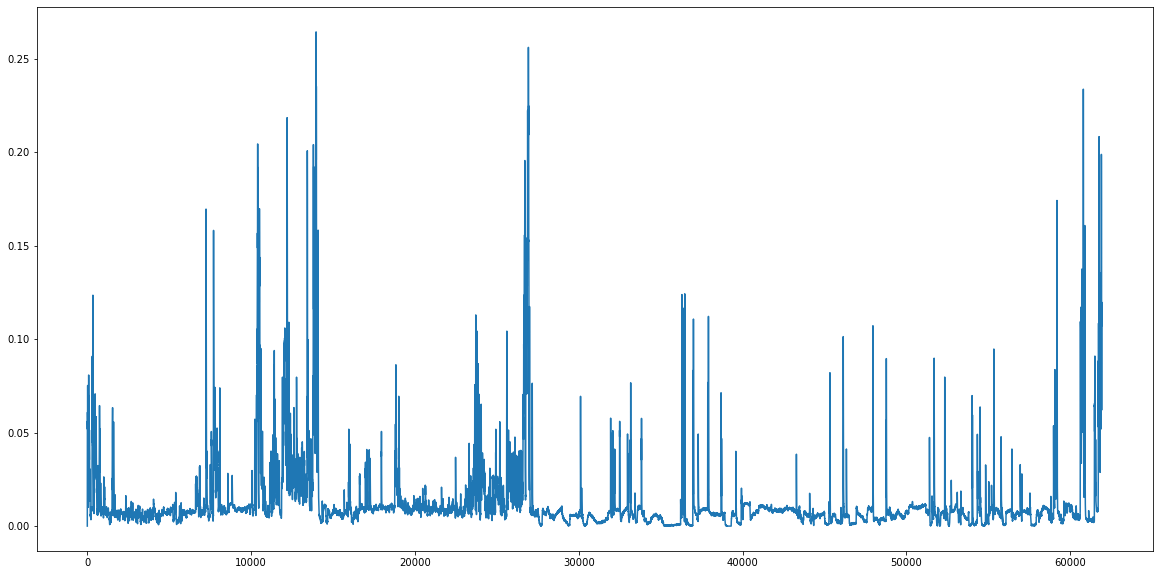

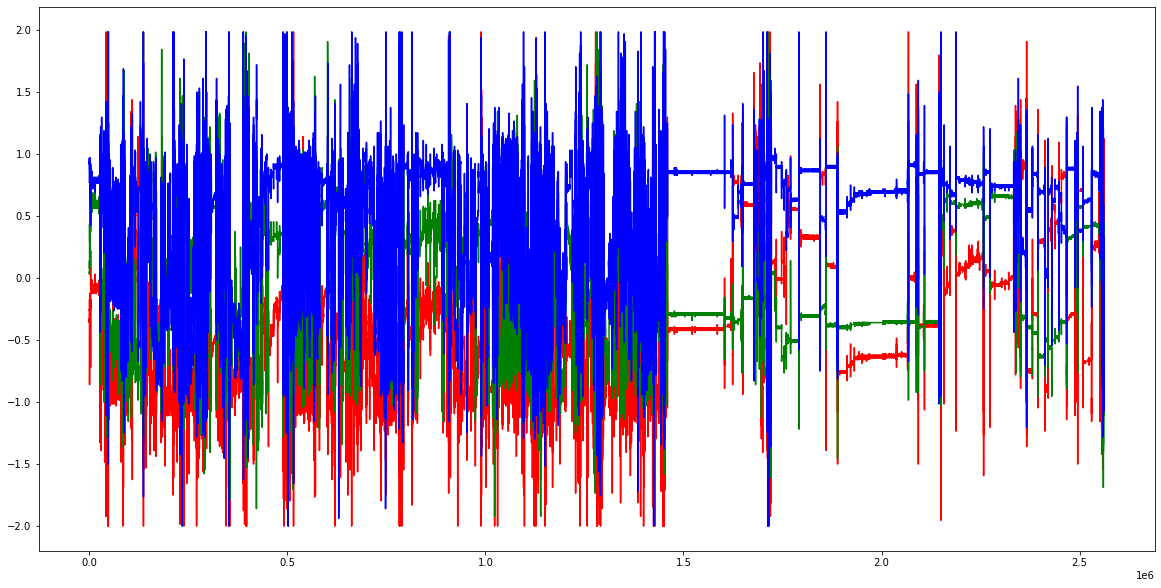

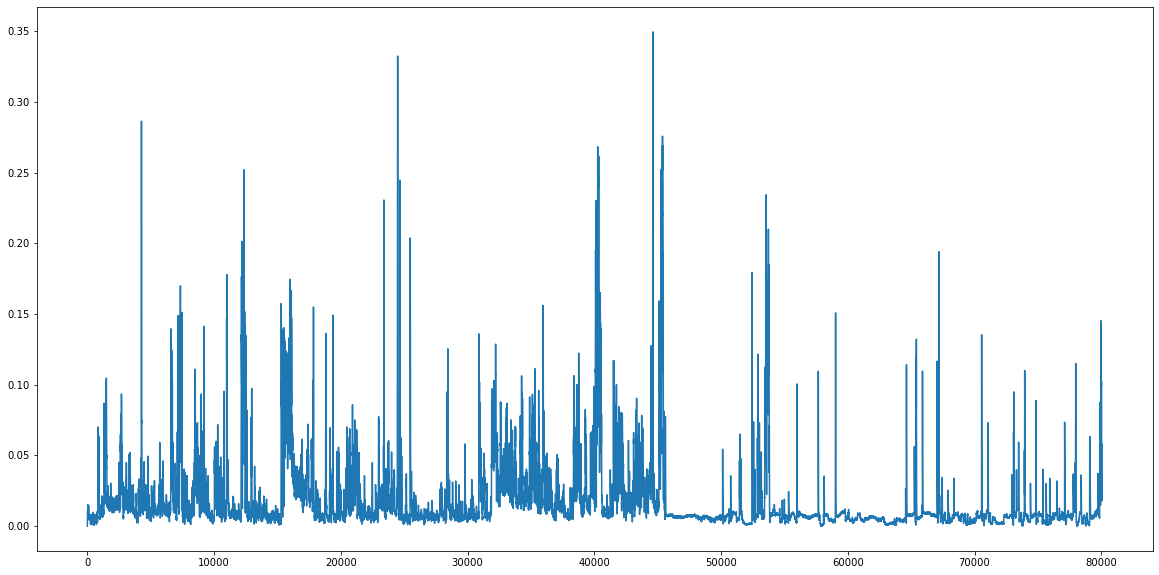

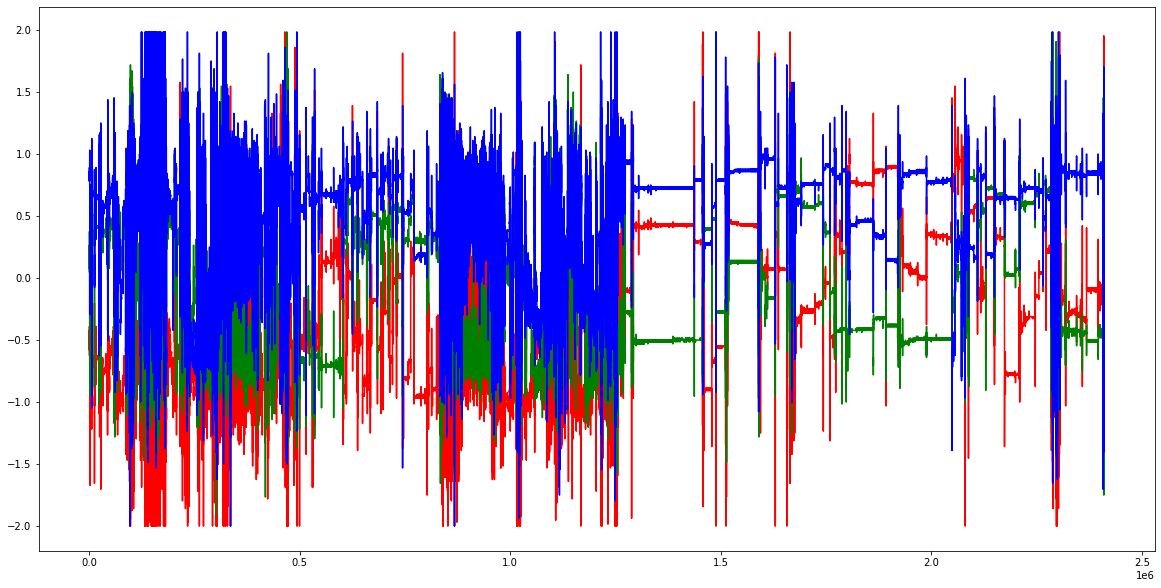

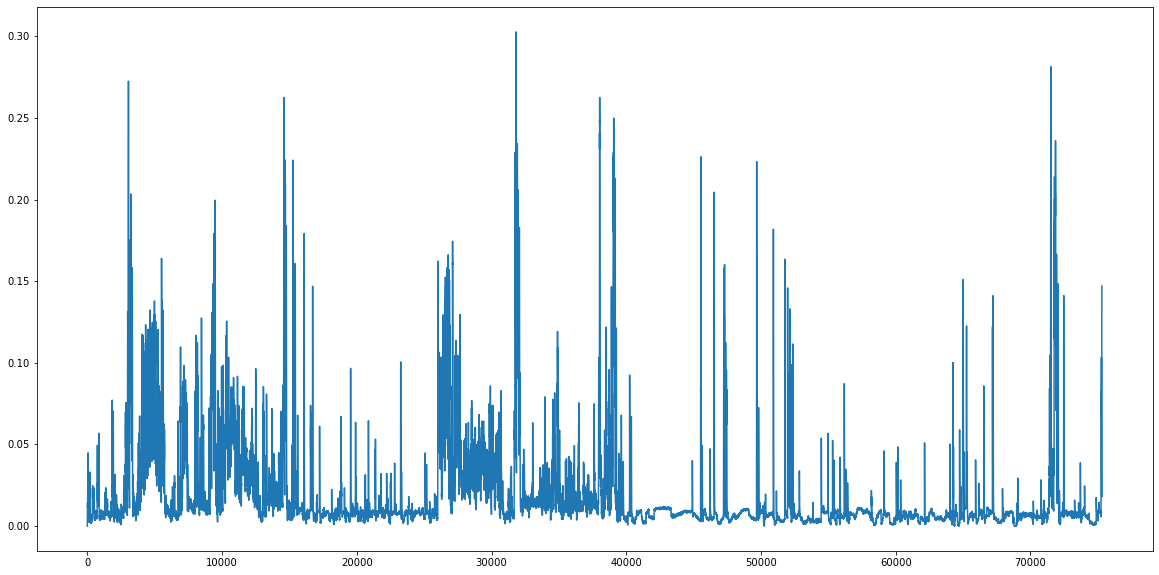

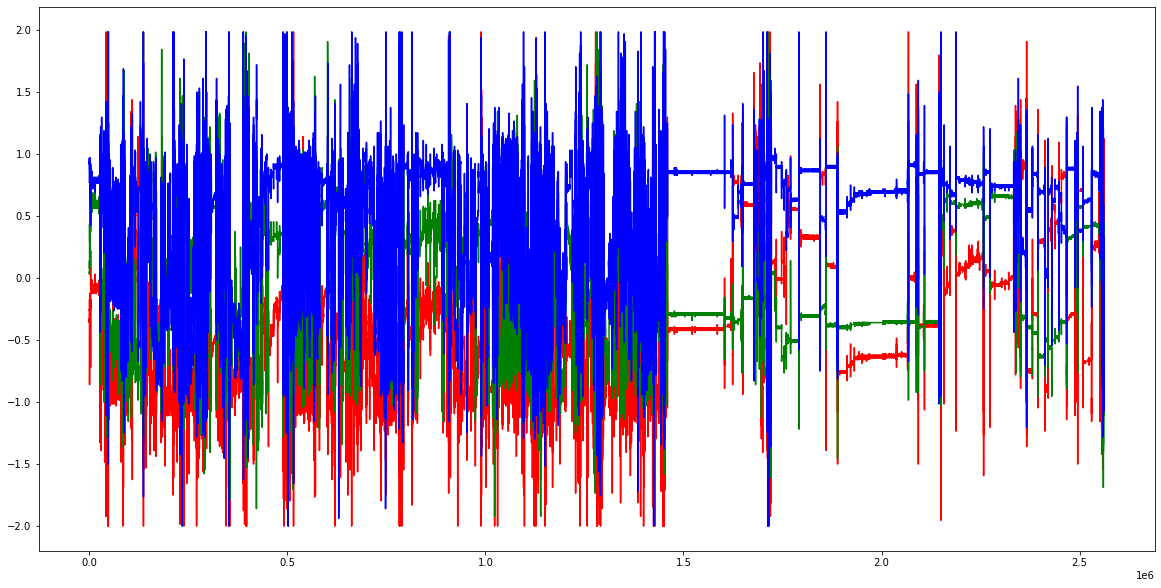

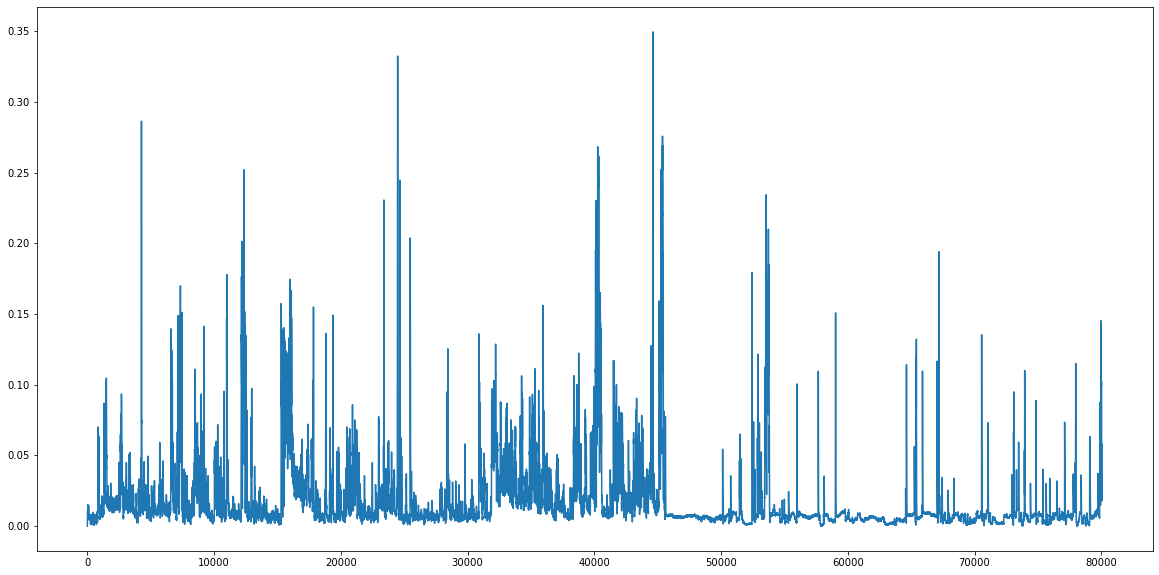

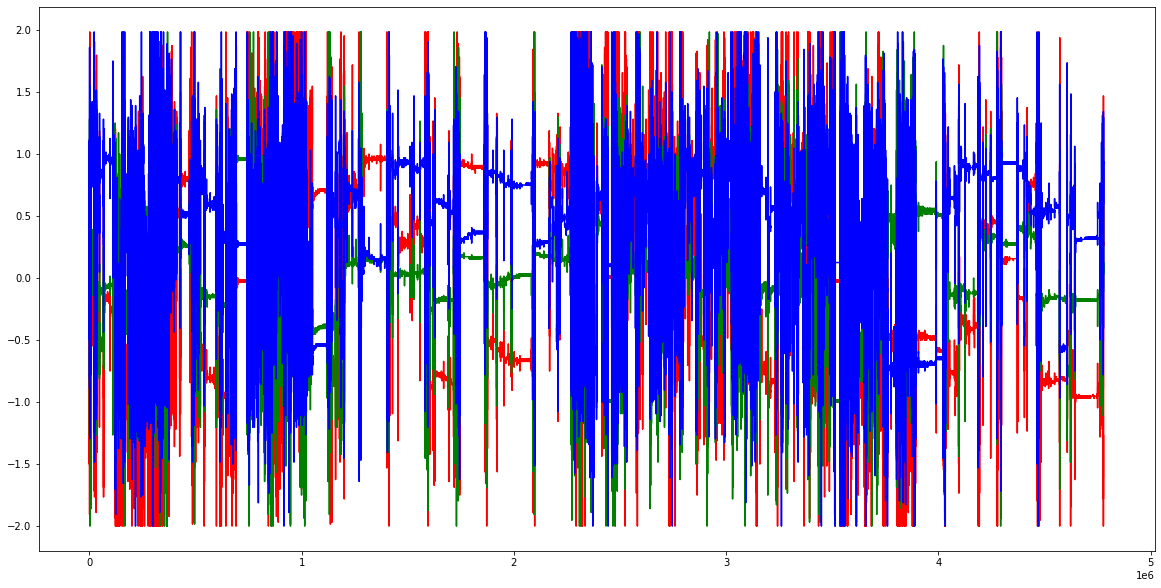

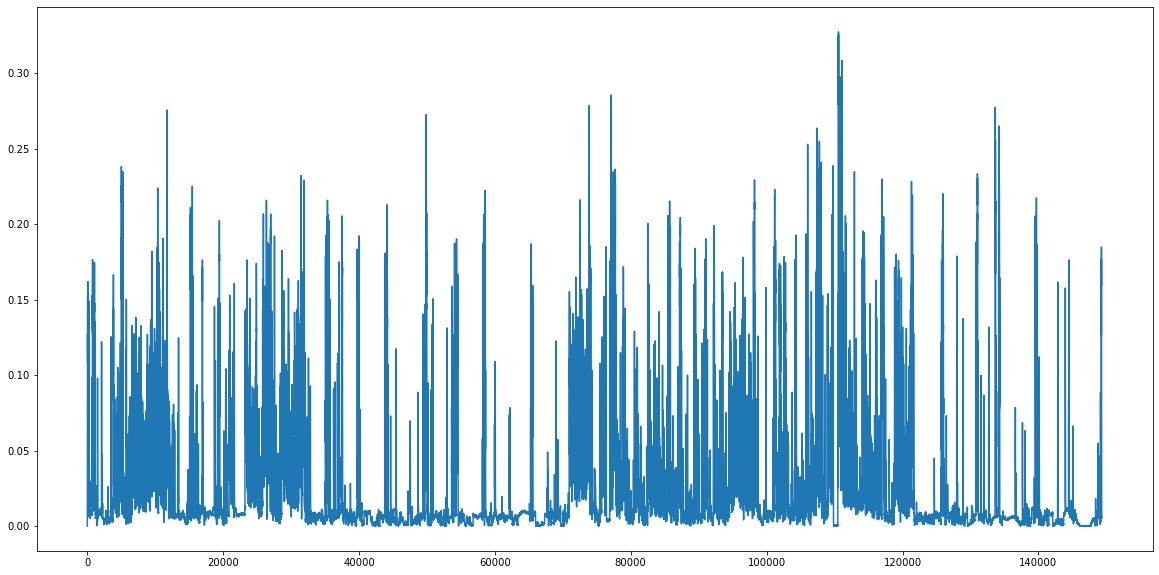

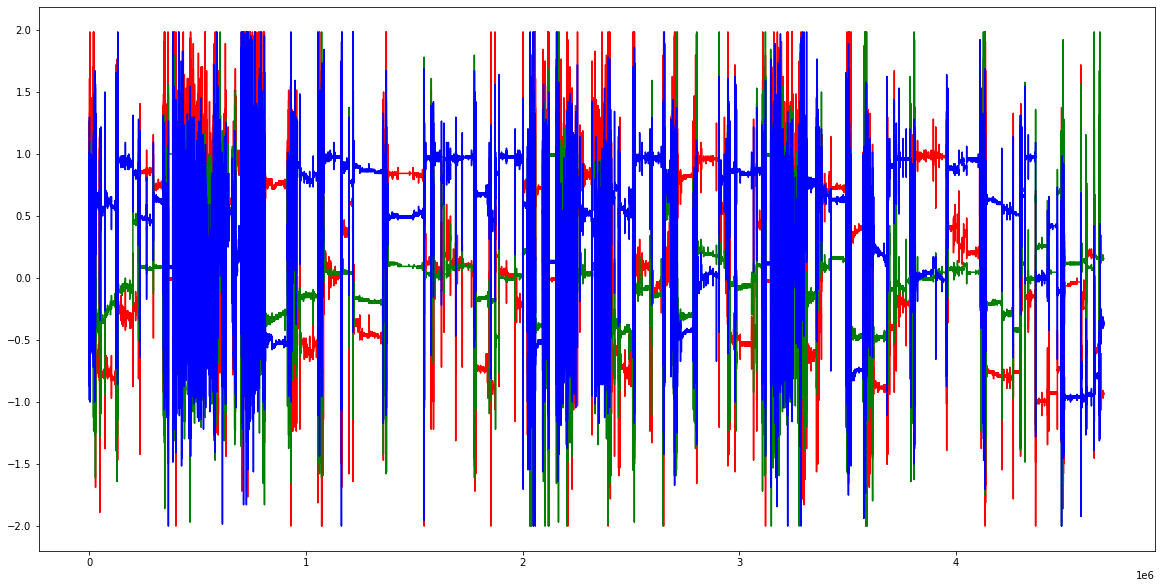

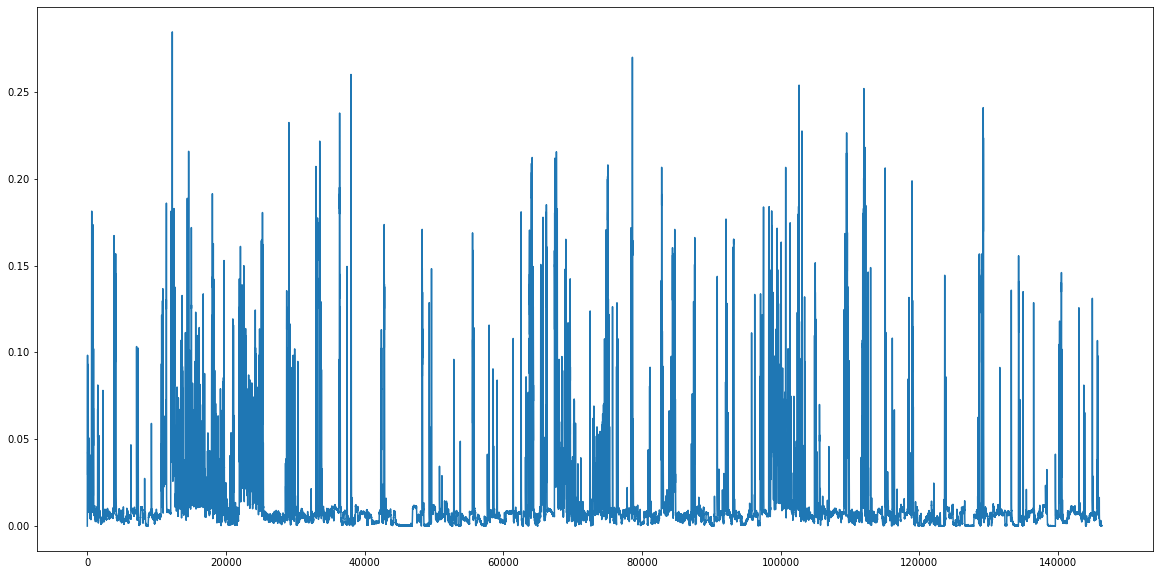

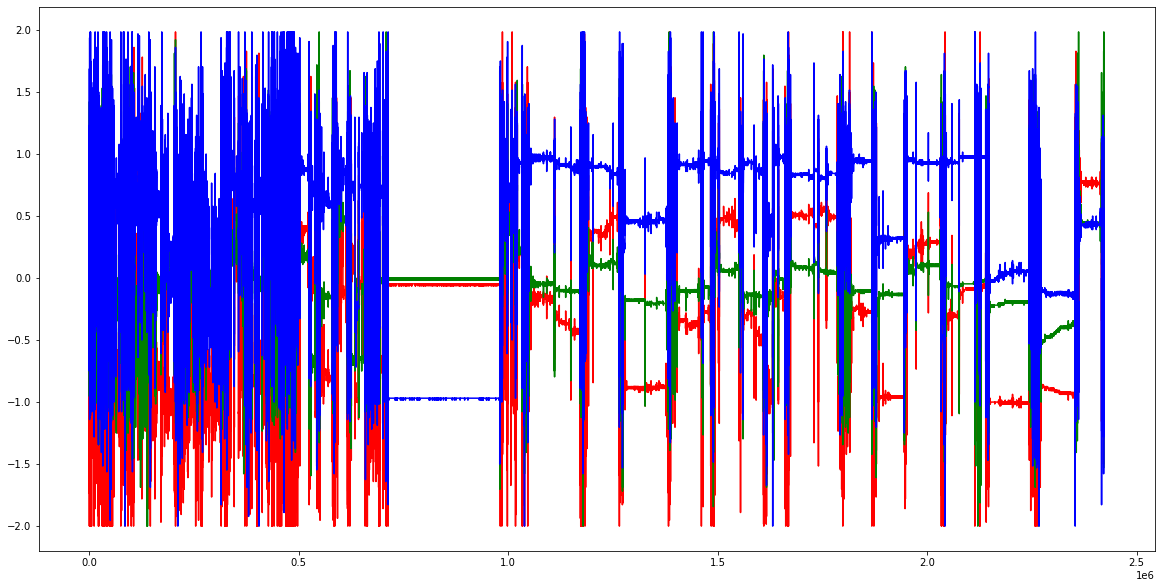

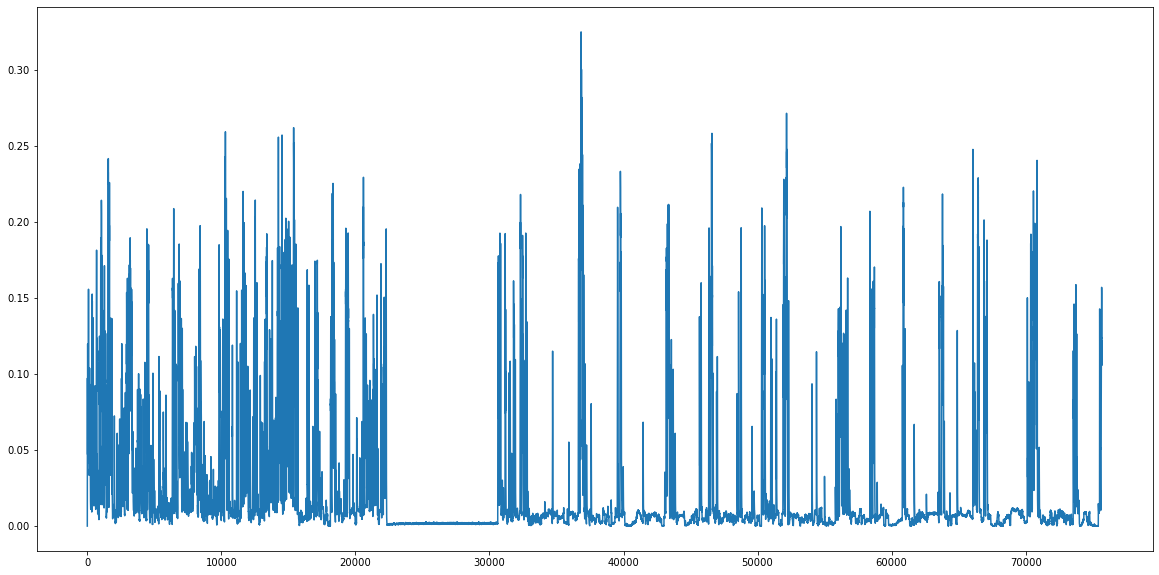

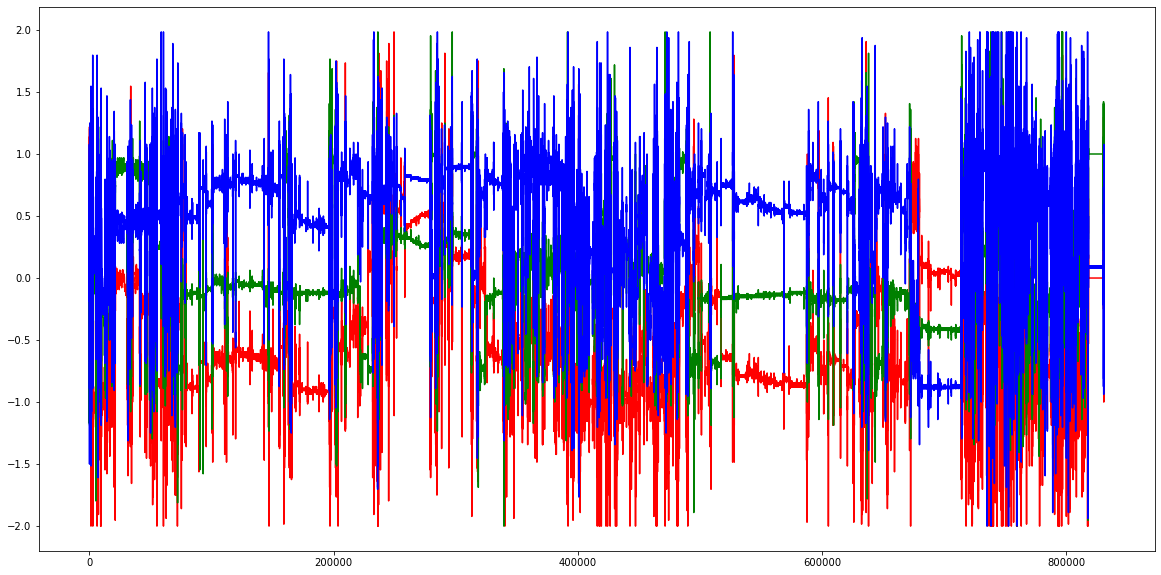

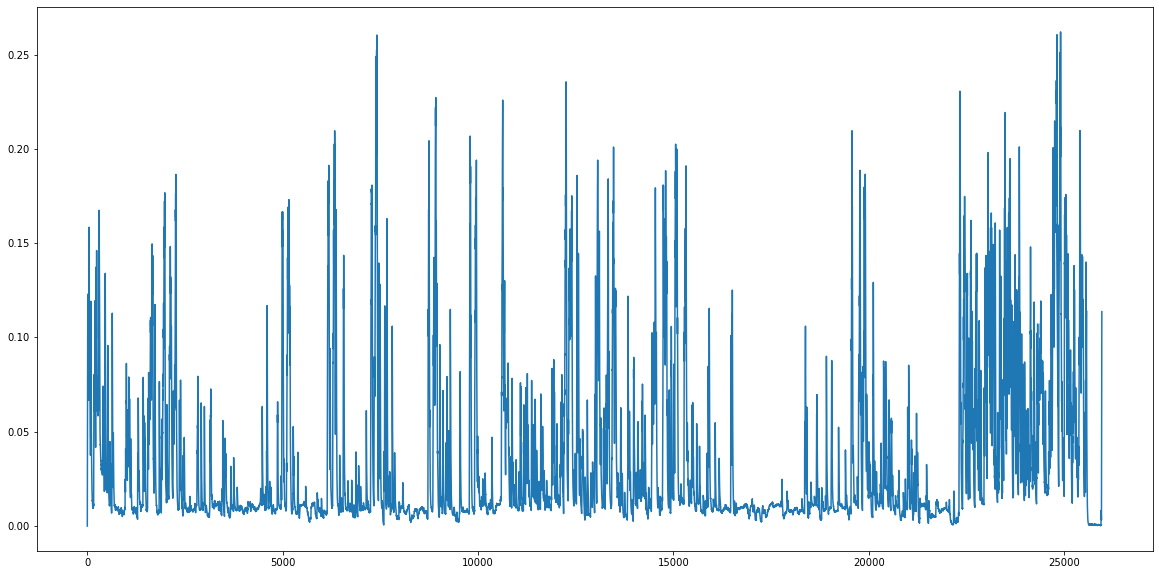

In [4]:
for filepath in glob.glob('**/*.csv', recursive=True):
    
    # creat dir if not exist
    (head, tail) = path_leaf(filepath)
    if not os.path.exists('output/'+head):
        os.makedirs('output/'+head)
        
    newpath = os.path.join('output/', head, tail)
    
    
    df = pd.read_csv(filepath, names=['x','y','z'], usecols=[0,1,2], skiprows = [0,1])
    df *= 2/128
    
    plt.figure(figsize=(20,10))
    # plot accelerometer data from Connect
    plt.plot(df['x'], color='r')
    plt.plot(df['y'], color='g')
    plt.plot(df['z'], color='b')
    plt.savefig(newpath+'_raw.jpg', dpi=100)
    
    # calculate sum and avg
    sums = []
    avgs = []
    sum = 0
    avg = 0
    for i in range(len(df)):
        if i % 32 == 0:
            sums += [sum]
            avg = avg*0.9+(sum/32)*0.1
            avgs += [avg]
            sum = 0
        else:
            sum += max(abs(df['x'][i] - df['x'][i-1]), abs(df['y'][i] - df['y'][i-1]), abs(df['z'][i] - df['z'][i-1]));
    
    # plot avg data
    plt.figure(figsize=(20,10))
    plt.plot(avgs)
    plt.savefig(newpath+'_avg.jpg', dpi=100)
    
    
    df2 = pd.DataFrame(avgs, columns=['avg'])
#     print(df2)
    df2.to_csv(newpath, index = False, header=True)    